 # Análisis de audios como datos brutos

En este ejercicio, se calificará un distinto tipo de dato en comparación con actividades anteriores, por lo que será de crucial importancia el manejo de ellos para que los algoritmos de clasificación actúen de buena manera. En este caso se trabajará con datos de audios extraídos con extensión .wav. El dataset utilizado corresponde a datos generados por el público mediante la aplicación de Iphone *Istethoscope Pro*.

El objetivo será la clasificación de los sonidos como latido normal o una subcategoría de anormal como *Murmur*,*Extra Heart Sound*,*Artifact*.

Para trabajar con los archivos .wav se utiliza el siguiente código:

In [2]:
import numpy as np
from scipy.io import wavfile
def clean_filename(fname,string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
        file_name = string + file_name
    return file_name
SAMPLE_RATE = 44100
def load_wav_file(name,path):
    s,b = wavfile.read(path+name)
    assert s == SAMPLE_RATE
    return b


###  a) Descripción de datos

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('set_a.csv')
print "Cantidad de datos:", df.shape[0] 
print "Cantidad de atributos:", df.shape[1]
print "\n Cada ejemplo es de la forma: \n"
print df[:1]
def clase_ocurrencia(df,campo):
    clases = {}
    for index,row in df.iterrows():
        if row[campo] not in clases.keys():
                clases[row[campo]] = 1
        else:
            clases[row[campo]] += 1
    return clases

clases = clase_ocurrencia(df,'label')
print "\n Registros por clase"

for k,v in clases.items():
    print "Clase:"+str(k).title()+"  Registros:"+str(v)+"\n" 

Cantidad de datos: 176
Cantidad de atributos: 4

 Cada ejemplo es de la forma: 

  dataset                             fname     label  sublabel
0       a  set_a/artifact__201012172012.wav  artifact       NaN

 Registros por clase
Clase:Nan  Registros:52

Clase:Extrahls  Registros:19

Clase:Murmur  Registros:34

Clase:Artifact  Registros:40

Clase:Normal  Registros:31



El dataset entregado consta de 176 archivos *.wav*, cada ejemplo posee 4 atributos:   

**dataset**: Indica el dataset al cual pertenece el *.wav*, en este caso todos pertenecen al a.              
**fname**: Es el nombre del archivo *.wav*.         
**label**: Es la categoría asignada al audio.         
**sublabel**: Corresponde a la subcategoría, pero no aplica, dado que las subcategorías ya están incluidas en label.        

Por cada clase se encuentra la siguiente cantidad de datos:

<table style="width:100%">
  <tr>
    <th><center>Clase</center></th>
    <th><center>Cantidad de registros</center></th> 
</tr>
  <tr>
    <td><center>Nan</center></td>
    <td><center>52</center></td> 
  </tr>
  <tr>
    <td><center>Artifact</center></td>
    <td><center>40</center></td> 
  </tr>
  <tr>
    <td><center>Murmur</center></td>
    <td><center>34</center></td> 
  </tr>
  <tr>
    <td><center>Normal</center></td>
    <td><center>31</center></td> 
  </tr>
  <tr>
    <td><center>Extrahls</center></td>
    <td><center>19</center></td> 
  </tr>
</table>



Las categorías involucradas tienen como significado;   

**NaN** : Es la categoría donde el audio no puede ser identificado en ninguna subcategoría.

**Artifact** : En la categoría Artifact hay una amplia gama de sonidos diferentes, que incluyen chillidos y ecos de realimentación, voz, música y ruido. Por lo general, no hay sonidos cardíacos discernibles y, por lo tanto, poca o ninguna periodicidad temporal en frecuencias inferiores a 195 Hz.

** Extrahls **:Se pueden identificar los sonidos cardíacos adicionales porque hay un sonido adicional, p. un "lub-lub dub" o un "lub dub-dub". Un sonido cardíaco adicional puede no ser un signo de enfermedad. Sin embargo, en algunas situaciones es un signo importante de enfermedad, que si se detecta temprano podría ayudar a una persona.

**Murmur** : Los soplos cardíacos suenan como si hubiera un ruido de "silbido, rugido, estruendo o fluido turbulento" en uno de los dos lugares temporales: (1) entre "lub" y "dub", o (2) entre "dub" y "lub" ". Pueden ser un síntoma de muchos trastornos cardíacos, algunos serios.

### b) Lectura de archivos .wav y Transformación en secuencias de tiempo

In [4]:
def padd_zeros(array,length):
    aux = np.zeros(length)
    aux[:array.shape[0]] = array
    return aux

new_df =pd.DataFrame({'file_name' : df['fname'].apply(clean_filename,string='Aunlabelledtest')})
new_df['time_series'] = new_df['file_name'].apply(load_wav_file, path='./set_a/')
new_df['len_series'] = new_df['time_series'].apply(len)
new_df['time_series']=new_df['time_series'].apply(padd_zeros,length=max(new_df['len_series']))

print "Series de tiempo"
print new_df['time_series']


Series de tiempo
0      [1.0, -3.0, -1.0, -7.0, -9.0, -2.0, -6.0, -5.0...
1      [-2.0, 3.0, -4.0, 4.0, -3.0, 2.0, -1.0, 0.0, 0...
2      [6.0, -4.0, -9.0, -1.0, -4.0, 1.0, -5.0, 2.0, ...
3      [-85.0, -198.0, -214.0, -173.0, -177.0, -206.0...
4      [53.0, -35.0, 47.0, 170.0, 340.0, 436.0, 535.0...
5      [-2.0, 2.0, -2.0, 2.0, -2.0, 1.0, 1.0, -3.0, 3...
6      [47.0, 70.0, 47.0, 58.0, 53.0, 45.0, 13.0, 21....
7      [605.0, 648.0, 473.0, 171.0, -203.0, -512.0, -...
8      [-49.0, 0.0, 17.0, -43.0, 30.0, 9.0, -29.0, 50...
9      [52.0, -1291.0, -1116.0, 101.0, 2429.0, 3776.0...
10     [-1.0, 0.0, 1.0, -2.0, 3.0, -3.0, 3.0, -3.0, 3...
11     [97.0, 152.0, 167.0, 168.0, 140.0, 113.0, 75.0...
12     [-1390.0, -1358.0, -1372.0, -1377.0, -1396.0, ...
13     [19664.0, 22367.0, 24463.0, 25936.0, 26723.0, ...
14     [-5.0, -5.0, 2.0, -2.0, -3.0, -16.0, -2.0, 20....
15     [6.0, 86.0, 21.0, 73.0, 52.0, 25.0, -53.0, -24...
16     [-15901.0, -16151.0, -16527.0, -16737.0, -1654...
17     [71.0, 

El Padding consiste en rellenar un arreglo hasta un cierto valor con una cantidad de 0s para que todos queden con la misma cantidad de datos, en este caso (*padd_zeros*). Sirve para una estandarización de los datos, con esto son más fáciles de trabajar ( puede ser requerido para algún tipo de algoritmo) y es posible realizar comparaciones entre secuencias. Cabe destacar que se realiza el padding tomando en cuenta el mayor largo de las series de tiempo para así no perder información importante.

### c) Cambio de etiquetas

A continuación, se cambian las etiquetas de los audios a otras según un docto experto:

In [5]:
new_labels =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0,
2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0,
0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,2]
labels = ['artifact','normal/extrahls', 'murmur']
new_df['target'] = [labels[i] for i in new_labels]
nuevas_clases = clase_ocurrencia(new_df,'target')
print "Registros por clase con nuevas etiquetas: \n"
for k,v in nuevas_clases.items():
    print "Clase:"+str(k).title()+"  Registros:"+str(v)+"\n" 



Registros por clase con nuevas etiquetas: 

Clase:Normal/Extrahls  Registros:65

Clase:Murmur  Registros:53

Clase:Artifact  Registros:58



Los registros por clase se especifican a continuación:

<table style="width:100%">
  <tr>
    <th><center>Clase</center></th>
    <th><center>Cantidad de registros</center></th> 
</tr>
  <tr>
    <td><center>Normal/Extrahls</center></td>
    <td><center>65</center></td> 
  </tr>
  <tr>
    <td><center>Artifact</center></td>
    <td><center>58</center></td> 
  </tr>
  <tr>
    <td><center>Murmur</center></td>
    <td><center>53</center></td> 
  </tr>
</table>


La problemática de tener etiquetas mal asignadas radica en el momento del entrenamiento, dado que estaremos entregandole datos erroneos para la futura clasificación de un dato, por lo que lo más probable falle al momento de clasificar un nuevo ejemplo, en consecuencia se obtiene un mal clasificador.
Considerando la pequeña cantidad de datos, que un solo dato esté mal asignado a su etiqueta puede generar problemas a la hora de la predicción con un conjunto de test.

#### (No entendí la pregunta ¿Un solo dato puede afectar eso? => Problemas en entrenamiento / clasificación, lo que puse es lo que creo xd)

### d) Codificación a valores numéricos

A continuación se codifican los datos para que puedan ser trabajdos por los algoritmos clasificadores:

In [6]:
new_df["target"] = new_df["target"].astype('category')
cat_columns = new_df.select_dtypes(['category']).columns
new_df[cat_columns] = new_df[cat_columns].apply(lambda x: x.cat.codes)

### e) Desorden de datos / Matriz de datos

In [7]:
new_df = new_df.sample(frac=1,random_state=44) # Hace un muestreo aleatorio
X = np.stack(new_df['time_series'].values, axis=0)
y = new_df.target.values
X.shape

(176L, 396900L)

Cada instante de tiempo es un atributo de cada ejemplo, en este caso son 396900, lo cual puede ser una complicación al momento del entrenamiento por el gran tamaño que poseen. Hay que tener en cuenta también la maldición de la dimensionalidad, es más complejo clasificar con una gran cantidad de atributos, por lo que se debe hacer una ingeniería de atributos.

### f) Pre-procesamiento - Transformada de Fourier discreta

In [8]:
X_fourier = np.abs(np.fft.fft(X))

En esta línea de código se realiza una transformada de fourier discreta para pasar los datos desde el dominio de tiempos a un dominio de frecuencias.

### g) Muestreo representativo

Para continuar el pre procesamiento, se realiza un muestreo representativo, a través de una técnica especial para seuencias:

In [9]:
from scipy import signal
X_resampled = []
for i in range(X_fourier.shape[0]):
    sequence = X_fourier[i,:].copy()
    resampled_sequence = signal.resample(sequence,100000) #Tecnica de muestreo especializado en secuencias
    X_resampled.append(resampled_sequence)
X_resampled = np.array(X_resampled)
X_resampled.shape

(176L, 100000L)

Este paso beneficia en reducir la dimensionalidad de los ejemplos. Dado de que luego de 396900, con el remuestreo quedó en 100000 atributos cada secuencia.
Se podría determinar de manera práctica si el muestreo es representativo haciendo un clasificador con los ejemplos completos o con el muestreo y comparar los resultados.

### h) Conjuntos de pruebas / Hold-out validation

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y,test_size=0.25,random_state=42)
print "Tamaño de cada conjunto"
print "X_train => Ejemplos:"+str(X_train.shape[0])+ "  Dimension de cada uno:"+str(X_train.shape[1])
print "X_test  => Ejemplos:"+str(X_test.shape[0])+ "  Dimension de cada uno:"+str(X_test.shape[1])
print "y_train =>", y_train.shape
print "y_test =>", y_test.shape
ytr = set()
yts = set()
for i in y_train:
    ytr.add(i)
for i in y_test:
    yts.add(i)
print ytr
print yts

Tamaño de cada conjunto
X_train => Ejemplos:132  Dimension de cada uno:100000
X_test  => Ejemplos:44  Dimension de cada uno:100000
y_train => (132L,)
y_test => (44L,)
set([0, 1, 2])
set([0, 1, 2])


Con las sugerencias del doctor experto, quedaron 3 clases, y cada una de ellas está en ambos conjuntos.
El conjunto de entrenamiento queda con 132 audios, a su vez el conjunto de test con 44.

### i) Estandarización de datos 

Para seguir con la estandarización de datos( previamente se había realizado con el largo), se realiza ahora respecto a los datos, dejandolos centrados a una media 0 y a una distribución estándar unitaria.

In [12]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler(with_mean=True,with_std=True)
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)
print len(X_test[0])

100000


Corroborar:
    

In [13]:
print np.mean(X_test) # Deberia ser 0 pero como es fiteado en base a X_Train, posiblemente no lo sea.

-0.0937668471444


### j) Visualización a través de PCA


In [14]:
from sklearn.decomposition import PCA
d=2
pca_model = PCA(n_components=2)
pca_model.fit(X_train)
X_pca_train = pca_model.transform(X_train)
X_pca_test = pca_model.transform(X_test)
len(X_pca_train)

132

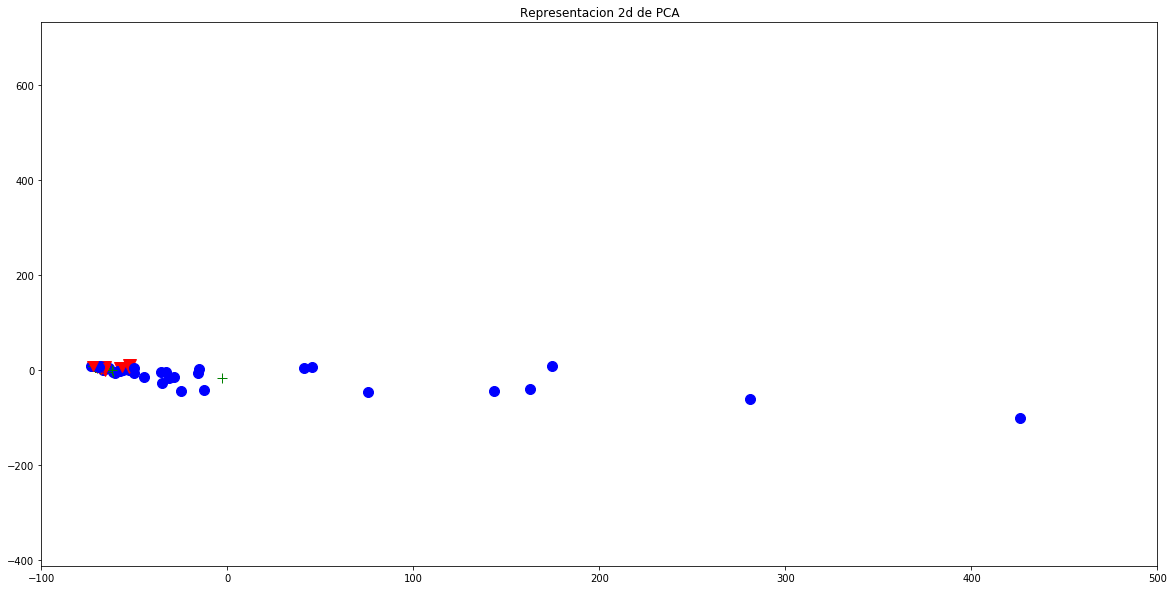

In [15]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

colors={0:'b',1:'g',2:'r'}
markers={0:'o',1:'+',2: 'v'}
labels = range(3)

plt.figure(figsize=(20,10))
for i in range(0,len(X_pca_train)):
    label = y_train[i]
    line = plt.plot(X_pca_train[i][0],X_pca_train[i][1],color=colors[label],marker=markers[label],markersize=10)
plt.title("Representacion 2d de PCA")
plt.xlim((-100,500))
plt.show()
    



Alguna observación?

In [16]:
#funcion utilizada para graficar el entrenamiento 
def plot_function(hist):
    loss_values1 = hist['loss']
    val_loss_values1 = hist['val_loss']
    epochs1 = range(1, len(loss_values1) + 1)
    f, axarr = plt.subplots(1,figsize=(14,6))
    
    axarr.plot(epochs1, loss_values1, 'bo-', label = "Training set")
    axarr.plot(epochs1, val_loss_values1, 'g^-',label = "Val set")
    axarr.set_title('Loss Autoencoder')
    axarr.set_ylim(0,0.4)
    axarr.set_xlabel('Epochs')
    axarr.set_ylabel('Loss')
    axarr.legend(loc="upper right", fancybox= True)

    plt.show()
    
# Graficar :



### k) Modelo de Regresión Logística / SVM

Hacer gráficos !! con Cs = [0.0001,0.01,0.1,1,10,100,1000]

In [17]:
from ipywidgets import interactive
import matplotlib.pyplot as plt

def visualize_border(model,x,y,title=""):
    fig = plt.figure(figsize=(12,6))
    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min,y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

def visualize_border_interactive(param):
    model = train_model(param)
    visualize_border(model,X,y)

from sklearn.linear_model import LogisticRegression as LR
def train_model(param):
    model = LR()
    model.set_params(C=param)
    model.fit(X_train,y_train)
    return model
#p_min = 1
#p_max = 100
#interactive(visualize_border_interactive,param=(p_min,p_max))


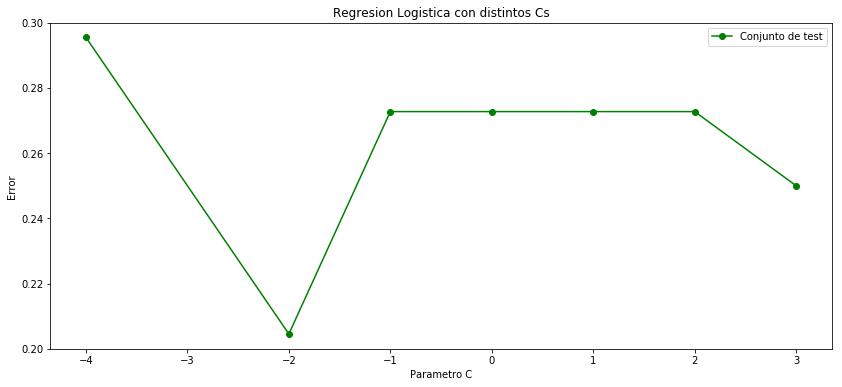

In [19]:
Cs = [0.0001,0.01,0.1,1,10,100,1000]
ln_Cs = np.log10(Cs)
Error = []
for c in Cs:
    modelo = train_model(c)
    Error.append(1-modelo.score(X_test,y_test))

f,axarr = plt.subplots(1,figsize=(14,6))
axarr.plot(ln_Cs,Error,'go-',label="Conjunto de test")
axarr.set_title("Regresion Logistica con distintos Cs")
axarr.set_xlabel('Parametro C')
axarr.set_ylabel('Error')
axarr.legend(loc="upper right", fancybox= True)
plt.show()

    

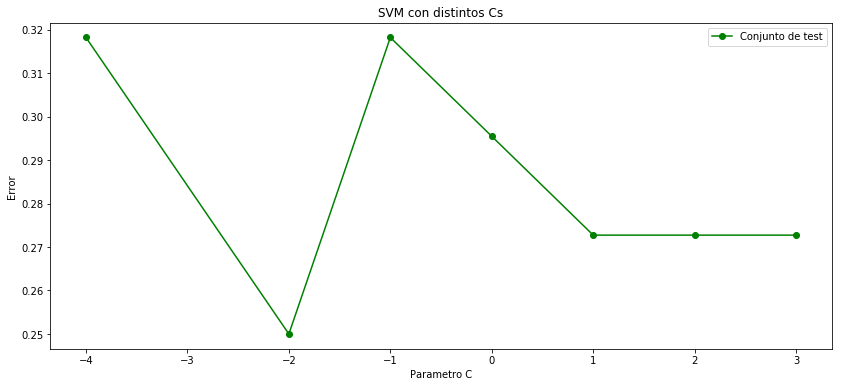

In [20]:
# SVM
from sklearn.svm import SVC as SVM #SVC is for classification
error_svm = []
def train_model_SVM(param):
    model= SVM()
    model.set_params(C=param,kernel='linear')
    model.fit(X_train,y_train)
    return model
for c in Cs:
    modelo_svm = train_model_SVM(c)
    error_svm.append(1-modelo_svm.score(X_test,y_test))

f,axarr = plt.subplots(1,figsize=(14,6))
axarr.plot(ln_Cs,error_svm,'go-',label="Conjunto de test")
axarr.set_title("SVM con distintos Cs")
axarr.set_xlabel('Parametro C')
axarr.set_ylabel('Error')
axarr.legend(loc="upper right", fancybox= True)
plt.show()
    

### l) Árbol de Decisión

In [21]:
from sklearn.tree import DecisionTreeClassifier as Tree
X_tree = range(1,31)
Y_tree = []
for i in range(1,31):
    model = Tree()
    model.set_params(max_depth=i,criterion='gini',splitter='best')
    model.fit(X_train,y_train)
    Y_tree.append(1-model.score(X_test,y_test))
    

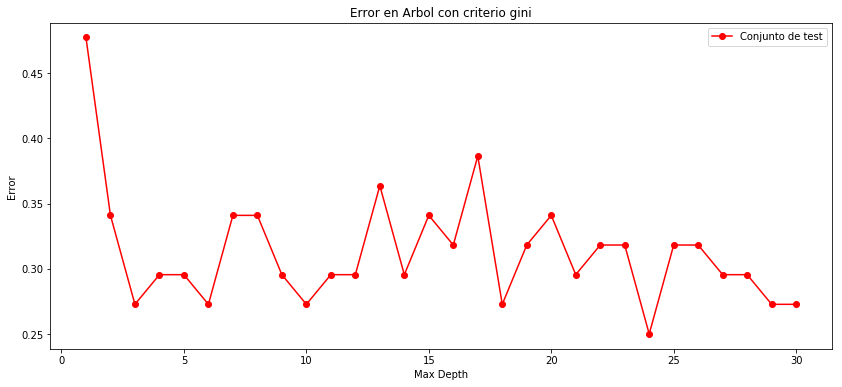

In [22]:
f,axarr = plt.subplots(1,figsize=(14,6))
axarr.plot(X_tree,Y_tree,'ro-',label="Conjunto de test")
axarr.set_title("Error en Arbol con criterio gini")
axarr.set_xlabel('Max Depth')
axarr.set_ylabel('Error')
axarr.legend(loc="upper right", fancybox= True)
plt.show()

In [23]:
X_tree = range(1,31)
Y_tree = []
for i in range(1,31):
    model = Tree()
    model.set_params(max_depth=i,criterion='entropy',splitter='best')
    model.fit(X_train,y_train)
    Y_tree.append(1-model.score(X_test,y_test))

f,axarr = plt.subplots(1,figsize=(14,6))
axarr.plot(X_tree,Y_tree,'ro-',label="Conjunto de test")
axarr.set_title("Error en Arbol con criterio entropy")
axarr.set_xlabel('Max Depth')
axarr.set_ylabel('Error')
axarr.legend(loc="upper right", fancybox= True)
plt.show()

KeyboardInterrupt: 

In [ ]:
#print "Predicciones:"
#print model.predict(X_test)
#print "Etiquetas Reales:"
#print y_test
#print model.score(X_test,y_test)
print X_train

La máxima profundidad del árbol no cumple alguna relación en cuanto al error del modelo a medida que va aumentando, no se observa una tendencia.

### m) Dimensiones d para PCA

In [ ]:
d = range(2,10000,100)
Y_d = []
for i in d:
    pca_model = PCA(n_components=i)
    pca_model.fit(X_train)
    X_pca_train = pca_model.transform(X_train)
    X_pca_test = pca_model.transform(X_test)
    model = Tree()
    model.set_params(max_depth=3,criterion='gini',splitter='best') # Máxima profundidad 3 ya que dio el menor valor de error.
    model.fit(X_pca_train,y_train)
    Y_d.append(1-model.score(X_pca_test,y_test))

f,axarr = plt.subplots(1,figsize=(14,6))
axarr.plot(d,Y_d,'ro-',label="Conjunto de test")
axarr.set_title("Error en Arbol de Decision con d dimensiones a traves de PCA")
axarr.set_xlabel('Dimensiones')
axarr.set_ylabel('Error')
axarr.legend(loc="upper right", fancybox= True)
plt.show()    

### n) Reducción a través de LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_lda = LDA(n_components=2)
model_lda.fit(X_train,y_train)
X_lda_train = model_lda.transform(X_train)
X_lda_test = model_lda.transform(X_test)

colors={0:'b',1:'g',2:'r'}
markers={0:'o',1:'+',2: 'v'}
labels = range(3)

plt.figure(figsize=(20,10))
for i in range(0,len(X_pca_train)):
    label = y_train[i]
    line = plt.plot(X_lda_train[i][0],X_lda_train[i][1],color=colors[label],marker=markers[label],markersize=10)
plt.title("Reduccion de dimensionalidad con LDA")
plt.xlim((-10,10))
plt.show()

Warning: Variables are collinear,

### o) El mejor modelo? PCA vs LDA 

In [ ]:
## Regresion Logistica
def train_model_LDA(param):
    model = LR()
    model.set_params(C=param)
    model.fit(X_lda_train,y_train)
    return model

error_lda = []
for c in Cs:
    modelo = train_model_LDA(c)
    error_lda.append(1-modelo.score(X_lda_test,y_test))

f,axarr = plt.subplots(1,figsize=(14,6))
axarr.plot(ln_Cs,error_lda,'go-',label="Conjunto de test LDA")
axarr.plot(ln_Cs,Error,'ro-',label="Conjunto de test PCA")

axarr.set_title("Regresion Logistica con distintos Cs PCA vs LDA")
axarr.set_xlabel('Parametro C')
axarr.set_ylabel('Error')
axarr.legend(loc="upper right", fancybox= True)
plt.show()


In [ ]:
## SVM kernel lineal
def train_model_SVM_LDA(param):
    model= SVM()
    model.set_params(C=param,kernel='linear')
    model.fit(X_lda_train,y_train)
    return model

error_svm_lda = []
for c in Cs:
    modelo_svm = train_model_SVM_LDA(c)
    error_svm_lda.append(1-modelo_svm.score(X_lda_test,y_test))

f,axarr = plt.subplots(1,figsize=(14,6))
axarr.plot(ln_Cs,error_svm_lda,'go-',label="Conjunto de test LDA")
axarr.plot(ln_Cs,error_svm,'ro-',label="Conjunto de test PCA")
axarr.set_title("SVM con distintos Cs")
axarr.set_xlabel('Parametro C')
axarr.set_ylabel('Error')
axarr.legend(loc="upper right", fancybox= True)
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier as Tree
pca_model_t = PCA(n_components=2)
pca_model_t.fit(X_train)
X_pca_train = pca_model_t.transform(X_train)
X_pca_test = pca_model_t.transform(X_test)
terror_pca = []
terror_lda = []

## Arbol de Decision Con Max depth = 13 ya que es el de menor error!
X_tree = range(1,31)
for i in range(1,31):
    model = Tree()
    model.set_params(max_depth=i,criterion='gini',splitter='best')
    model.fit(X_pca_train,y_train)
    terror_pca.append(1-model.score(X_pca_test,y_test))
    model = Tree()
    model.set_params(max_depth=i,criterion='gini',splitter='best')
    model.fit(X_lda_train,y_train)
    terror_lda.append(1-model.score(X_lda_test,y_test))

f,axarr = plt.subplots(1,figsize=(15,10))
axarr.plot(X_tree,terror_lda,'go-',label="Conjunto de test LDA")
axarr.plot(X_tree,terror_pca,label="Conjunto de test PCA")
axarr.set_title("Error en Arbol de Decision PCA vs LDA")
axarr.set_xlabel('Maxima Profundidad')
axarr.set_ylabel('Error')
axarr.legend(loc="upper right", fancybox= True)
plt.show()  


Porqué se comporta así!?

### p) Feature crafting